In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal

In [2]:
N = 10
M = [0, 1, 3, 9]

In [14]:
def create_dataset(num):
    dataset = DataFrame(columns=['x', 'y'])
    for i in range(num):
        x = float(i) / float(num-1) + normal(scale=0.005)
        y = np.sin(2 * np.pi * x) + normal(scale=0.5)
        dataset = dataset.append(Series([x, y], index=['x', 'y']), ignore_index=True)
    return dataset

In [4]:
def calc_error(dataset, f):
    size = len(dataset)
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 1/2 * (y - f(x))**2
    return np.sqrt(2 * err / size)

In [42]:
# directly calc coef with min error
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0, m+1):
        p = dataset.x**i
        p.name = 'x**%d' % i
        phi = pd.concat([phi, p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)
    
    def f(x):
        y = 0
        for c, w in enumerate(ws):
            y += w * (x**c)
            #print(f'{c}: {y}')
        return y
    
    return (f, ws)

In [15]:
train = create_dataset(N)
train

,x,y
0,0.000603,0.390132
1,0.102242,0.818284
2,0.228377,0.667470
3,0.334783,0.681326
4,0.438740,0.223842
5,0.558122,0.146403
6,0.667125,-1.323398
7,0.773525,-1.790789
8,0.889407,-1.746857
9,1.010991,-0.879451


In [16]:
test = create_dataset(N)
test

,x,y
0,0.001193,-0.714126
1,0.117490,0.978001
2,0.225781,0.797252
3,0.323338,0.507436
4,0.439213,0.521730
5,0.551757,-0.475908
6,0.670031,-0.734339
7,0.773286,-1.057974
8,0.890261,-1.228016
9,1.007217,0.379115


Table of the coef:
        M=0       M=1        M=3            M=9
0 -0.281304  1.008798   0.241569       0.278789
1       NaN -2.578184   8.932354     186.786098
2       NaN       NaN -28.786616   -4286.286861
3       NaN       NaN  18.478947   39006.883005
4       NaN       NaN        NaN -185676.086879
5       NaN       NaN        NaN  512560.997258
6       NaN       NaN        NaN -849555.322696
7       NaN       NaN        NaN  832657.383895
8       NaN       NaN        NaN -444240.512169
9       NaN       NaN        NaN   99342.606346


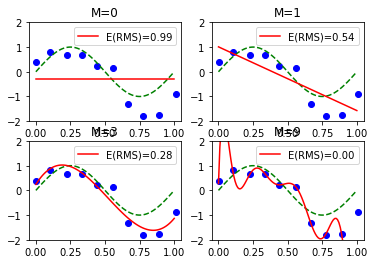

In [43]:
df_ws = DataFrame()
fig = plt.figure()

for i, m in enumerate(M):
    f, ws = resolve(train, m)
    df_ws = df_ws.append(Series(ws, name=f'M={m}'))
    
    subplot = fig.add_subplot(2, 2, i+1)
    subplot.set_xlim(-0.05, 1.05)
    subplot.set_ylim(-2, 2)
    subplot.set_title(f'M={m}')
    
    subplot.scatter(train.x, train.y, marker='o', color='blue')
    
    linex = np.linspace(0, 1, 101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')
    
    est_y = f(linex)
    #print(est_y)
    subplot.plot(linex, est_y, color='red', label=f'E(RMS)={calc_error(train, f):.2f}')
    subplot.legend(loc=1)
    
print("Table of the coef:")
print(df_ws.transpose())